In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import axes3d
import scipy.io.wavfile as wavf

# 12.1 Basico de Transformaciones de fourier y la transformacion de Fourier
Inicialmente se observaran como usar estas y las graficas que salen al usarlo 

In [3]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[1:n]

u=np.exp(-(x**2))
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)
fre=np.linspace(-63,63,127)

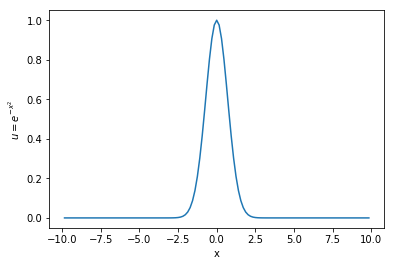

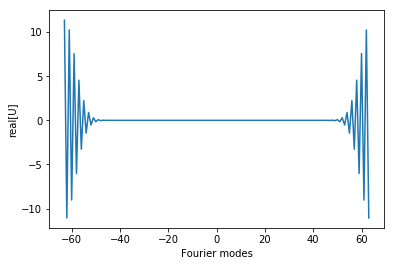

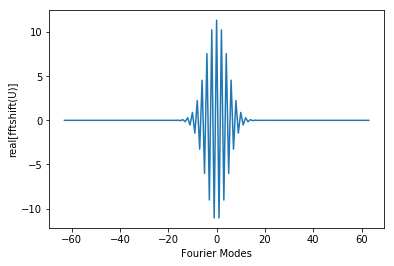

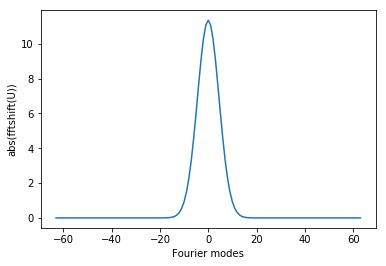

In [4]:
plt.plot(x,u)
plt.xlabel('x')
plt.ylabel('$u=e^{-x^2}$')
plt.show()
plt.plot(fre,np.real(ut))
plt.xlabel('Fourier modes')
plt.ylabel('real[U]')
plt.show()
plt.plot(fre,np.real(utshift))
plt.xlabel('Fourier Modes') 
plt.ylabel('real[fftshift(U)]')
plt.show()
plt.plot(fre,np.abs(utshift))
plt.xlabel('Fourier modes')
plt.ylabel('abs(fftshift(U))')
plt.show()

La primera grafica muestra la funcion original. La segunda son los modos de fourier tomando los datos positivos y iniciales Ya en la tercera se muestran las frecuencias pero en el lado positivo y negativo. En realidad solo se necesitan los datos positivos para saber las frecuencias con las que se estan trabajando.Finalmente se observa la una linea de que muestra como cambia la amplitud al variar el modo de frecuencia.  

In [5]:
L=20
n=128

x2=np.linspace(-L/2,L/2,n+1)
x=x2[1:n]
dx=x[1]-x[0]
u=1/(np.cosh(x))
ut=np.fft.fft(u)

k=2*np.pi/L*np.asarray(list(range(0,int(n/2)))+list(range(int(-n/2+1),0)))
ut1=1.0j*k*ut # primera derivada
ut2=-k*k*ut #Segunda derivada
u1=np.real(np.fft.ifft(ut1))
u2=np.real(np.fft.ifft(ut2))
u1exact=-1/np.cosh(x)*np.tanh(x)
u2exact=1/np.cosh(x)-2/(np.cosh(x)**3)
len(u)
#segundo orden
ux=[None]*(n-1)
ux[0]=(-3*u[0]+4*u[1]-u[2])/(2*dx)

for j in range(1,n-2):
    ux[j]=(u[j+1]-u[j-1])/(2*dx)
    
ux[n-2]=(3*u[n-2]-4*u[n-3])/(2*dx)

# Cuarto orden 
ux2=[None]*len(ux)
ux2[0]=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2[1]=(-3*u[1]+4*u[2]-u[3])/(2*dx)

for j in range(2,n-3):
    ux2[j]=(-u[j+2]+8*u[(j+1)]-8*u[(j-1)]+u[j-2])/(12*dx)
ux2[n-3]=(3*u[n-3]-4*u[n-4]+u[n-5])/(2*dx)
ux2[n-2]=(3*u[n-2]-4*u[n-3]+u[n-4])


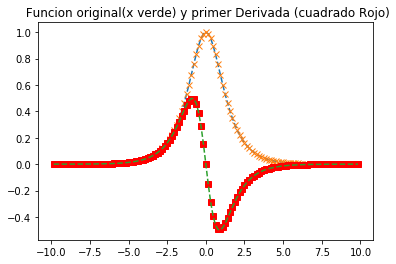

In [6]:
plt.plot(x,u,'--',x,np.real(np.fft.ifft(ut)),'x',x,u1,'rs ',x,u1exact,'--')
plt.title(' Funcion original(x verde) y primer Derivada (cuadrado Rojo)')
plt.show()

Esta grafica muestra lo preciso que es la transformación de Fourier para replicar las funciónes y para encontrar sus derivadas en realidad es dificil diferenciar los valores exactos de la función y su derivada de lo estimado con la transformada de Fourier. Según la literatura el error esta en el orden de 10^-6 y esto se cumple porque la función empieza y termina en el mismo lugar. Es decir puede ser periodica. En caso que la función no sea periodica se tendrían problemas en los bordes para las derivadas ya que reconstrucción de fourier siempre lleva a que las funciones sean periodicas por el dominio que se maneja. Es decir se tendrá un cambio drastico al final que no es deseado. 

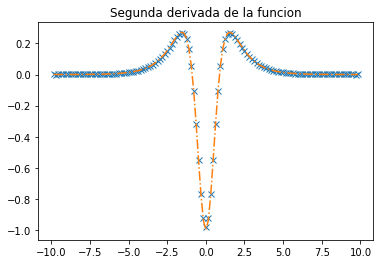

In [7]:
plt.plot(x,u2,'x',x,u2exact,'-.')
plt.title('Segunda derivada de la funcion')
plt.show()

# 12.2 Aplicacion en la detecion y el filtro de Radares

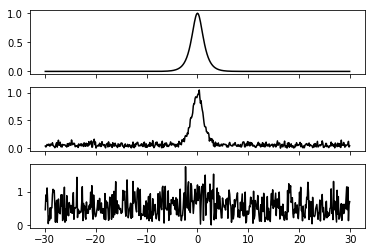

In [8]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[1:n]
k=(2*np.pi/(2*L))*np.asarray(list(range(0,int(n/2)))+list(range(int(-n/2+1),0)))

u=1/np.cosh(t)

#Noise 1
noise=1
ut=np.fft.fft(u)
utn=ut+noise*(np.random.normal(size=(n-1))+1.0j*np.random.normal(size=(n-1)))
un=np.fft.ifft(utn)
# Noise 2
noise=10
utn2=ut+noise*(np.random.normal(size=(n-1))+1.0j*np.random.normal(size=(n-1)))
un2=np.fft.ifft(utn2)
f,(ax1,ax2,ax3)=plt.subplots(3,sharex=True)
ax1.plot(t,u,'k')
ax2.plot(t,np.abs(un),'k')
ax3.plot(t,np.abs(un2),'k')
plt.show()


De estas tres imagenes se observa como progressivamente una señal se puede perder completamente por un ruido. En el ultimo suplot casi que ni se distinque el impulso. Más o menos se ve que aumenta pero no se ve nada de información util.

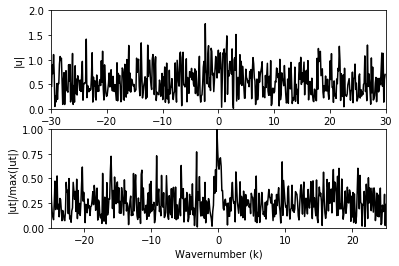

In [9]:
f,(ax1,ax2)=plt.subplots(2,sharex=False)
ax1.plot(t,abs(un2),'k')
ax1.set_xlabel('time(t)')
ax1.set_ylabel('|u|')
ax1.set_xlim(-30,30)
ax1.set_ylim(0,2)
ax2.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(utn2))/max(np.abs(np.fft.fftshift(utn2))),'k')
ax2.set_xlabel('Wavernumber (k)')
ax2.set_ylabel('|ut|/max(|ut|)')
ax2.set_xlim(-25,25)
ax2.set_ylim(0,1)
plt.show()

Estas graficas eran la reconstruccion en la primera en el tiempo de la señal claramente no se distingue. Mientras que en la segunda es posible ver que hay un pico en todo el centro.  

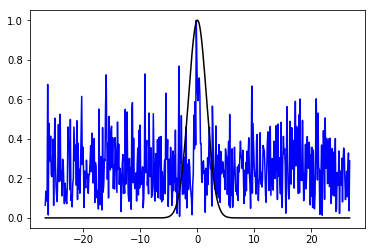

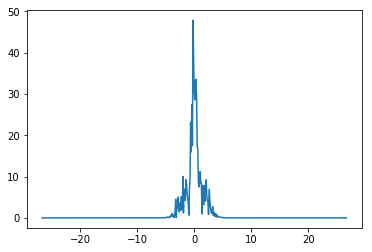

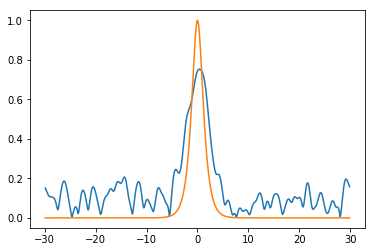

In [10]:
filt=np.exp(-0.2*(k)**2)
unft=filt*utn2
unf=np.fft.ifft(unft)

plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(utn2))/max(np.abs(np.fft.fftshift(utn2))),'b',np.fft.fftshift(k),np.fft.fftshift(filt),'k')
plt.show()
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unft)))
plt.show()
plt.plot(t,abs(unf),t,u)
plt.show()


La primera gráfica muestra la señal medida con respecto a como se deberia ver en el dominio de la frecuencia. La segunda muestra el efecto que tiene el filtro sobre el dominio de frecuencia. Finalmente la ultima muestra el resultado en el tiempo de la señal filtrada. Claramente esta se ve más cercano como se deberia ver. 

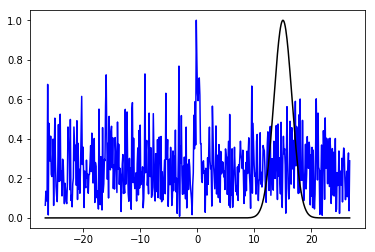

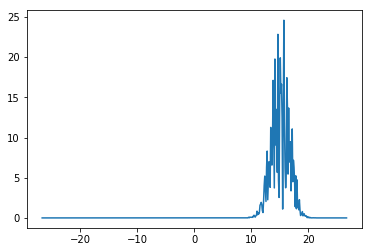

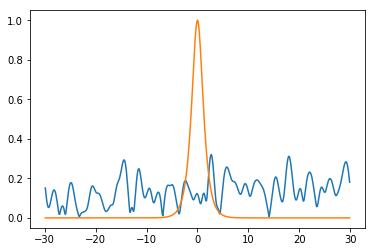

In [11]:
filt=np.exp(-0.2*(k-15)**2)
unft=filt*utn2
unf=np.fft.ifft(unft)

plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(utn2))/max(np.abs(np.fft.fftshift(utn2))),'b',np.fft.fftshift(k),np.fft.fftshift(filt),'k')
plt.show()
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unft)))
plt.show()
plt.plot(t,abs(unf),t,u)
plt.show()

Aqui se observa el resultado de mover hacia la izquierda el filtro. Claramente el impulso no esta dentro de esta frecuencia y es por eso que la señal final queda tan diferente a la señal que se busca (esta queda casi que inexistente.)

# Seccion 12.3

In [12]:
L=30
n=512
t2 = np.linspace(-L,L,n+1)
t=t2[1:n]
k=2*np.pi/(2*L)*np.asarray((list(range(0,n//2))+list(range(-n//2+1,0))))
ks=np.fft.fftshift(k)
noise=10

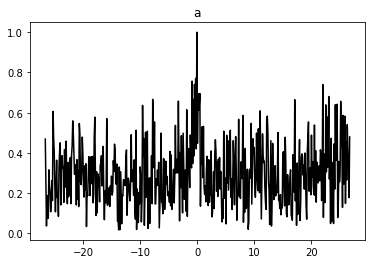

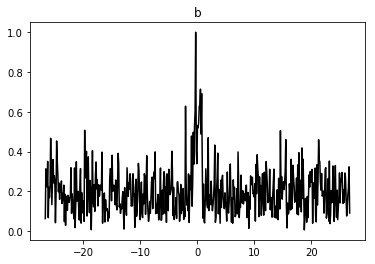

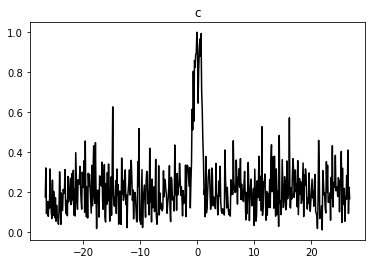

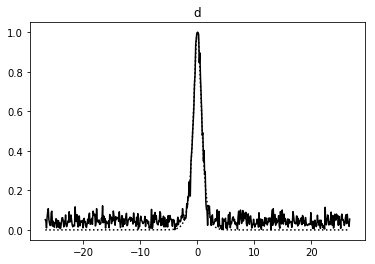

In [13]:
labels=['a','b','c','d']
realize=[1,2,5,100]

u=1/np.cosh(t)
ut=np.fft.fft(u)
for x in range(0,len(realize)):
    utn=np.asarray([ut+noise*(np.random.normal(size=(n-1))+1.0j*np.random.normal(size=(n-1)))])
    ave=utn[0]
    dat=np.asarray([np.abs(np.fft.fftshift(utn[0]))/(max(np.abs(utn[0])))])
    un=np.asarray([np.fft.ifft(utn[0])])
    
    for y in range(1,realize[x]):
        utp=np.asarray([ut+noise*(np.random.normal(size=(n-1))+1.0j*np.random.normal(size=(n-1)))])
        utn=np.concatenate((utn,utp),axis=0)
        ave=ave+utn[y]
        dap=np.asarray([np.abs(np.fft.fftshift(utn[y]))/(max(np.abs(utn[y])))])
        dat=np.concatenate((dat,dap),axis=0)
        up=np.asarray([np.fft.ifft(utn[y])])
        un=np.concatenate((un,up),axis=0)
    ave=np.abs(np.fft.fftshift(ave))/realize[x]
    
    plt.plot(ks,ave/max(ave),'k')
    plt.title(labels[x])
    if x==3:
        plt.plot(ks,abs(np.fft.fftshift(ut)/max(abs(ut))),'k:')
    plt.show()

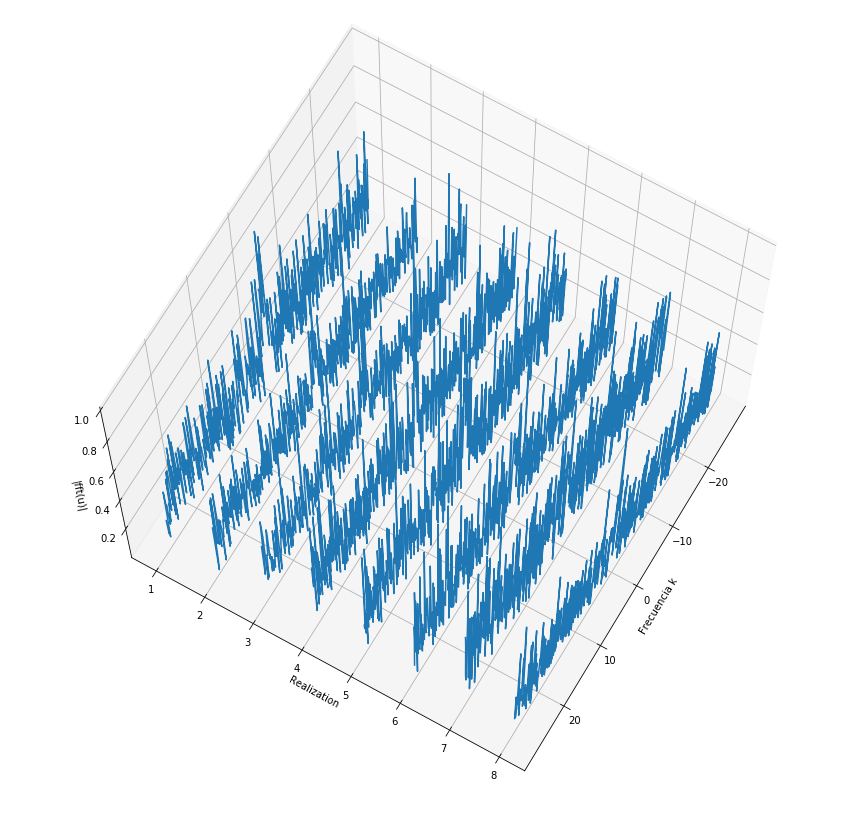

In [14]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
X,Y=np.meshgrid(ks,range(1,9))
Z=dat[:8]
ax.plot_wireframe(X,Y,Z,rstride=1,cstride=0)
ax.view_init(70,30)
plt.xlabel('Frecuencia k')
plt.ylabel('Realization')
ax.set_zlabel('|fft(u)|')
plt.show()


La anterior figura muestra las primeras 8 señales usadas para crear el promedio de la señal en el anterior punto cuando se usaron 100 señales. Se observa que en realidad ninguna sola permite observar la señal que se quiere medir. Es unicamente cuando se encuentra el promedio que se observa el dato que se esta buscando.

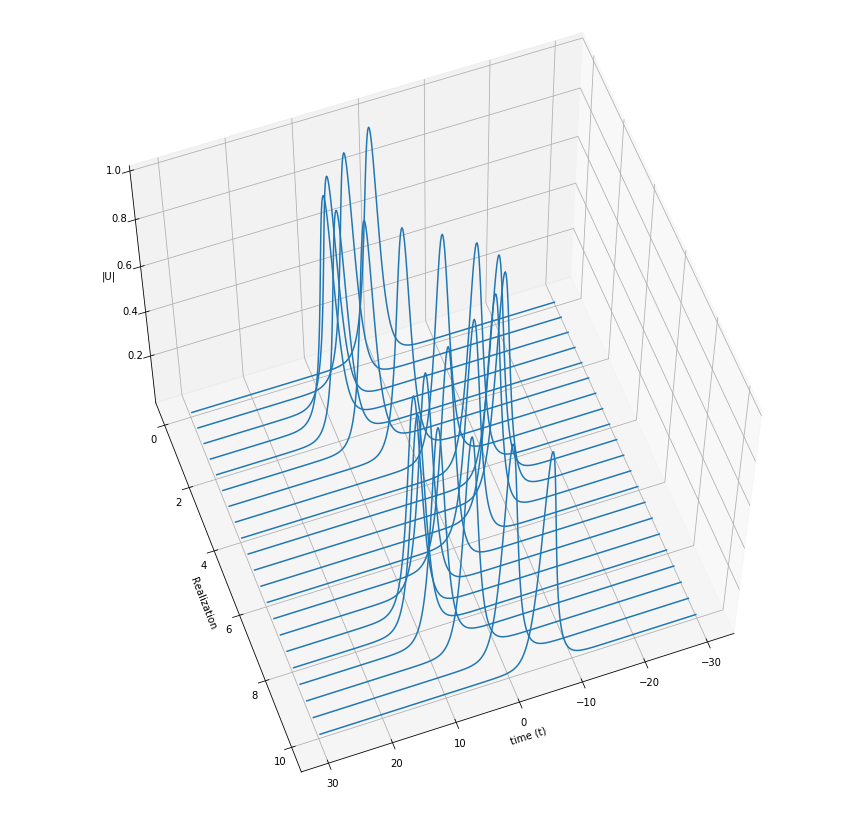

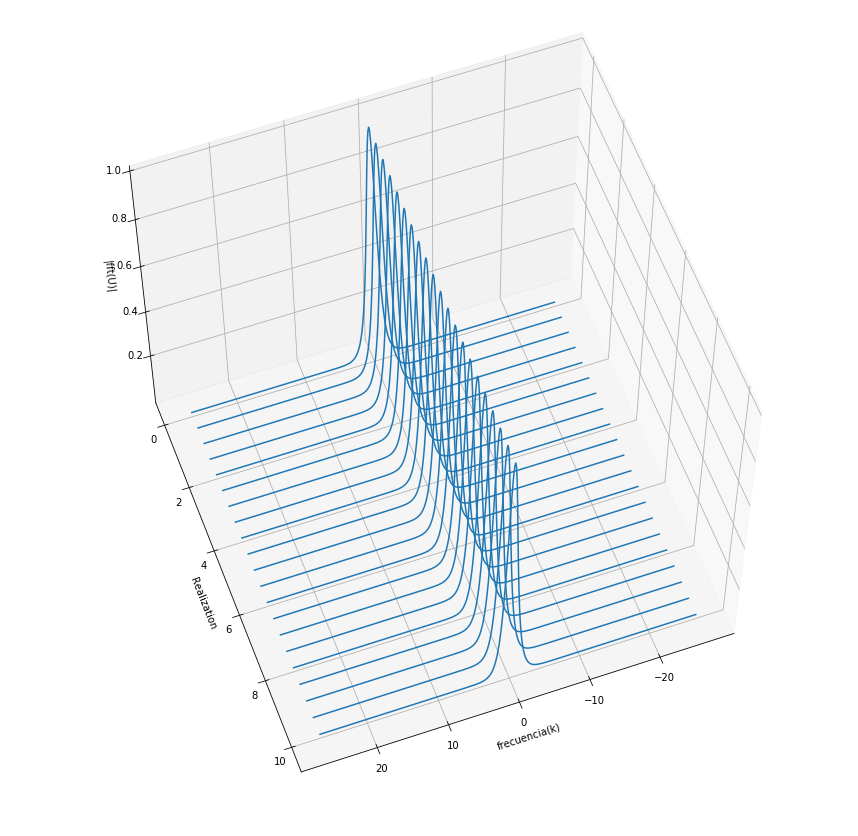

In [15]:
slic=np.arange(0,10.5,0.5)
T,S=np.meshgrid(t,slic)
K,S=np.meshgrid(k,slic)
U=np.real(1/np.cosh(T-10*np.sin(S))*np.exp(1.0j*0*T))

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
ax.plot_wireframe(T,S,U,rstride=1,cstride=0)
ax.view_init(60,70)
ax.set_zlabel('|U|')
ax.set_ylabel('Realization')
ax.set_xlabel('time (t)')






Ut=np.asarray([np.fft.fft(U[0])])
Kp=np.asarray([np.fft.fftshift(K[0])])
Utp=np.asarray([np.fft.fftshift(Ut[0])])
Utn=np.asarray([Ut[0]+noise*(np.random.normal(size=(n-1))+1.0j*np.random.normal(size=(n-1)))])
Utnp=np.asarray([np.fft.fftshift(Utn[0])/(max(abs(Utn[0])))])
Un=np.fft.ifft([Utn[0]])
for x in range(1,len(slic)):
    Ut=np.concatenate((Ut,np.asarray([np.fft.fft(U[x])])),axis=0)
    Kp=np.concatenate((Kp,np.asarray([np.fft.fftshift(K[x])])),axis=0)
    Utp=np.concatenate((Utp,np.asarray([np.fft.fftshift(Ut[x])])),axis=0)
    Utn=np.concatenate((Utn,np.asarray([Ut[x]+noise*(np.random.normal(size=(n-1))+1.0j*np.random.normal(size=(n-1)))])),axis=0)
    Utnp=np.concatenate((Utnp,np.asarray([np.fft.fftshift(Utn[x])/(max(abs(Utn[x])))])),axis=0)
    Un=np.concatenate((Un,np.fft.ifft([Utn[x]])),axis=0)
    
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
ax.plot_wireframe(Kp,S,abs(Utp)/max(abs(Utp[0])),rstride=1,cstride=0)
ax.set_zlabel('|fft(U)|')
ax.set_ylabel('Realization')
ax.set_xlabel('frecuencia(k)')
ax.view_init(60,70)


Las dos anteriores graficas muestran que la transformacion de fourier permiten encontrar la frecuencia que se busca de manera centrada. Sin importat como se mueve esta señal en el tiempo. No obstante, es importante observar que la transformacion de fourier no nos dice nada sobre la señal en el tiempo. Mientras que cuando se observa la señal en el tiempo se conoce como se mueve esta pero no su frecuencia. 

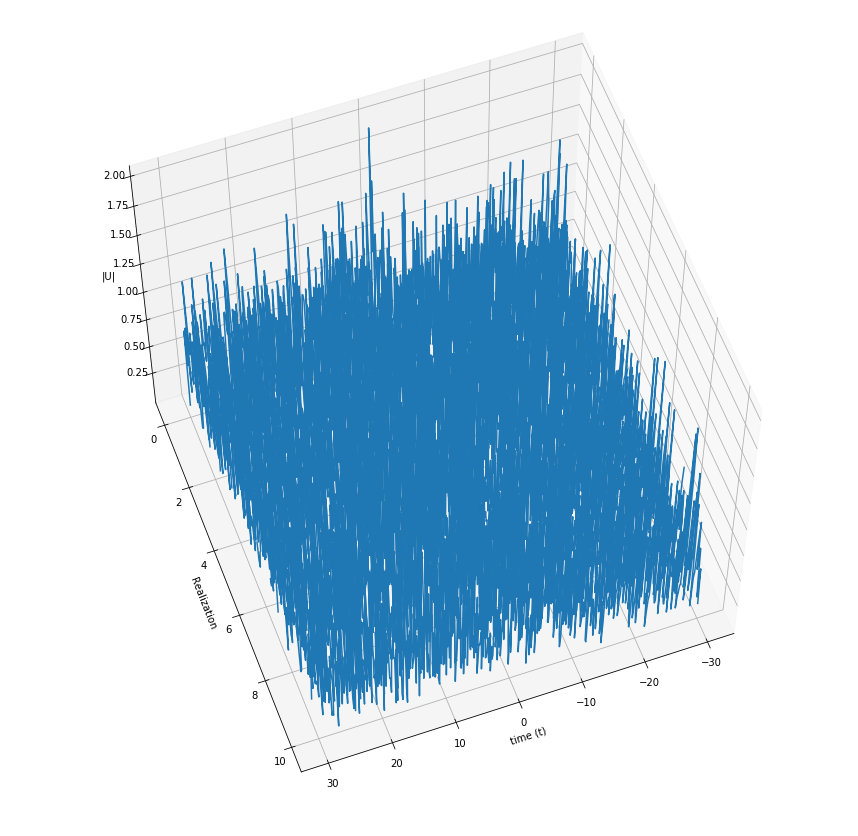

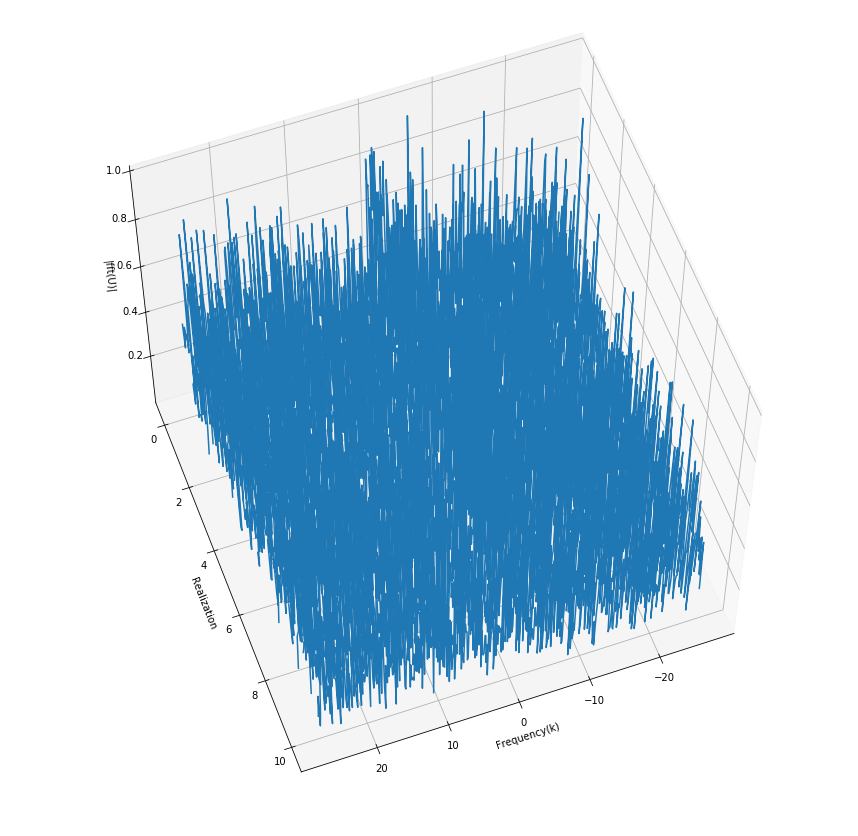

In [16]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
ax.plot_wireframe(T,S,abs(Un),rstride=1,cstride=0)
ax.set_zlabel('|U|')
ax.set_ylabel('Realization')
ax.set_xlabel('time (t)')
ax.view_init(60,70)

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
ax.plot_wireframe(Kp,S,abs(Utnp),rstride=1,cstride=0)
ax.set_zlabel('|fft(U)|')
ax.set_ylabel('Realization')
ax.set_xlabel('Frequency(k)')
ax.view_init(60,70)


En la anterior grafica se le agrego Ruido a las señal anteriormente graficada. Claramente ya no observa nada ni en el dominio del tiempo ni en el dominio de la frecuencia. Simplemente es una señal con ruido. 

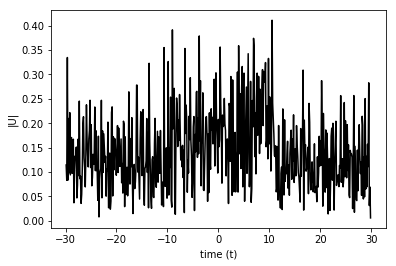

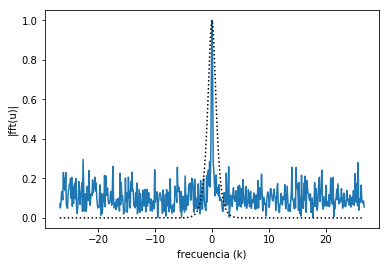

In [17]:

Uave=np.zeros((n-1))
Utave=np.zeros((n-1))

for x in range(0,len(slic)):
    Uave=Uave+Un[x]
    Utave=Utave+Utn[x]
Uave=Uave/len(slic)
Utave=np.fft.fftshift(Utave)/len(slic)

plt.plot(t,abs(Uave),'k')
plt.xlabel('time (t)')
plt.ylabel('|U|')
plt.show()

plt.plot(ks,abs(Utave)/max(abs(Utave)))
plt.plot(ks,abs(np.fft.fftshift(Ut[0]))/max(abs(Ut[0])),'k:')
plt.xlabel('frecuencia (k)')
plt.ylabel('|fft(u)|')
plt.show()

Ahora se promediaron las 8 graficas y se uso la transformación de fourier. En el espectro de tiempo este promedio no mejora nada. Ni se puede observar algun tipo de patros. No Obstante cuando se grafica en el dominio de frecuencia claramente se observa que el algoritmo es capaz de separar la frecuencia de la señal que se quiere medir. Aunque como en el anterior punto no se sepa cuando ocurren. Por otro lado esta información se podria usar para construir un filtro que solo permita pasar esta frecuencia. Y por ende así obsevar de mejor manera cada señal en el tiempo.

# Fourier en propio problema propio

En la siguiente sección se buscara estudiar las frecuencias de un acorde musical. En esta caso la C major usando fourier.


Primero se lee el archivo y se le hace la transformación de Fourier. y se plotea el espectro de frecuencia real y este se grafica.

D:\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


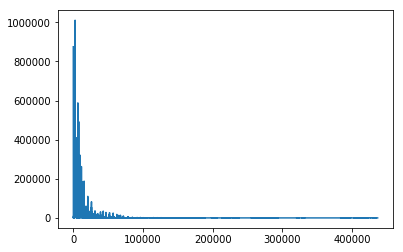

In [18]:
fs,x=wavf.read('Cmajor.wav')
a=x.T[0]

b=[(ele/2**8)*2-1 for ele in a]
c=np.fft.fft(b)
d=int(len(c)/2)
plt.plot(abs(c[:(d-1)]))
plt.show()



Luego se convierte el número de onda a la frecuencia real usando la frecuencia de muestreo y se limita el estudio a las primeras 20000 k's. Despues se plotean estos valores. 

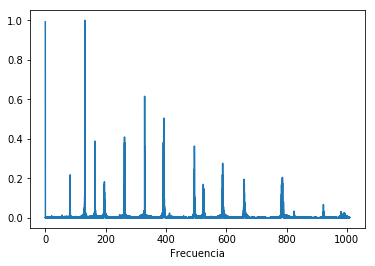

In [19]:
k=np.arange(len(x))
T=len(x)/fs
frqLabel=k/T
hasta=20000
freq=frqLabel[:hasta]
amp=abs(np.real(c[:hasta]))/max(abs(np.real(c)))
plt.plot(freq,amp)
plt.xlabel('Frecuencia')
plt.show()

#Notas son C E G

In [23]:
np.arange(len(x))

array([     0,      1,      2, ..., 874059, 874060, 874061])

La gráfica anterior muestra las amplitudes relativas vs la frecuencia. Se nota que hay picos a frecuencias muy espeficicas. Inicialmente no parece haber ningun tipo de patron. Encuanto cuales son estas frecuencias pico. Claramente por la manera que se estructura los acordes musicales estos acordes deben ser las notas C E y G las cuales componen el acorde C major. 

In [21]:
ids=[0]
df=100
for r in range(0,len(amp)):
  if amp[r]>0.15:
    mini=max((r-df,0))
    maxi=min((len(amp)-1,r+df))
    if max(amp[mini:maxi])==amp[r]:
        ids.append(r)
        
pksf=freq[ids]
pksf=pksf[2:]
print('Las frecuencias picos son:')
print(pksf)
      


Las frecuencias picos son:
[ 82.49243189 131.02926337 165.03531786 195.96367306 262.66397578
 329.31382442 393.54187689 494.29868819 523.76387487 587.99192735
 658.32492432 786.07467205]


Para saber si estas frecuencias si concuerdan con las frecuencias de las notas C,E,G se hace este algorithmo que encuentra los picos y luego encuentra la frecuencia a la que ocurren estos picos. 

Ahora segun "Physics of Music Notes " encontrado en el siguiente link:

https://pages.mtu.edu/~suits/notefreqs.html

Es posible encontrar las notas musicales que tienen la frecuencia más cercana a las encontradas con Fourier. (El primer valor es el valor teorico de la nota mientras que el segundo es el pico encontrado más cercano)

$E_2=82.41 \approx82.49 Hz$ 

$C_3=130.81 \approx131.029 Hz$ 

$E_3=164.81 \approx165.03531786 Hz$ 

$G_3=196.0 \approx195.96367306  Hz$ 

$C_4=261.63 \approx262.66397578 Hz$ 

$E_4=329.63 \approx329.31382442  Hz$ 

$G_4=392.0 \approx393.54187689  Hz$ 

$B_4=493.88 \approx494.29868819  Hz$ 

$C_5=523.25 \approx523.76387487 Hz$ 

$D_5=587.33 \approx587.99192735 Hz$ 

$E_5=659.25 \approx658.32492432  Hz$ 

$G_5=783.99 \approx786.07467205 Hz$ 

Se observa que los casi todos los picos concuerdan con las notas que componen los acordes. Solo el $B_4$ y $D_5$ no pertenecen a estos acordes. No obstante aparte de estos errores el programa corre exitosamente. Y es posible decir que los fourier es una funcion que implementada de forma correctap puede ser usado para crear un software de detección de acordes y de notas en la música.

 
    
 

Las referencias usadas para este taller son:
https://www.soundsnap.com/tags/c_major

https://music.stackexchange.com/questions/42694/what-is-a-chord-in-terms-of-frequencies

https://www.google.com.co/search?q=notes+in+a+C+chord&oq=notes+in+a+C+chord&aqs=chrome..69i57j69i60j69i59l2j69i60j69i61.3260j0j7&sourceid=chrome&ie=UTF-8
